# Our objective:
### Use Google Trends Data to see how consumer purchasing habits have shifted globally for type of Dog food in the last 3 months compared to previous 12 months

In [1]:
#Import our Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd                        
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [2]:
#Install and import Pytrends which is an Unofficial API for Google Trends.
from pytrends.request import TrendReq

In [3]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [4]:
pytrend = TrendReq()
#provide upto 6 search terms 
kw_list=['dry dog food',
         'canned dog food', 
         'raw dog food',
         'natural dog food']

### Search Trends for Last 12 Months

<AxesSubplot: xlabel='geoName'>

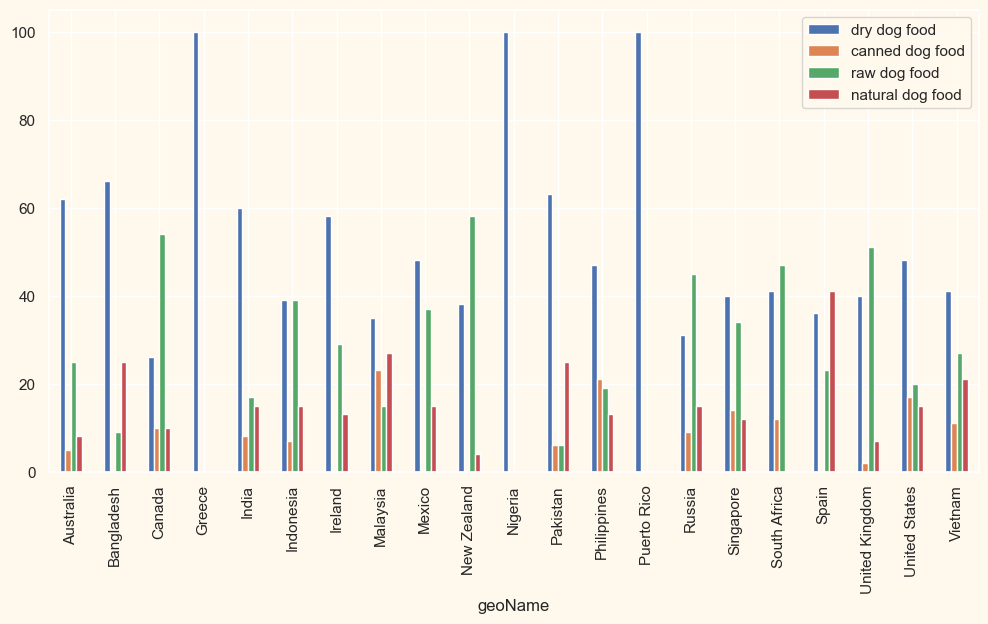

In [5]:
#search interest by Country in last 12 months
pytrend.build_payload(kw_list, timeframe='today 12-m')

# Interest by Country
regiondf_12m = pytrend.interest_by_region()

# #looking at rows where all values are not equal to 0
regiondf_12m = regiondf_12m[regiondf_12m.sum(axis=1)!=0]

# Visualize
regiondf_12m.plot(figsize=(12, 6), y=kw_list, kind ='bar')

#### 1.Dry Dog Food Search Trend

<AxesSubplot: xlabel='geoName'>

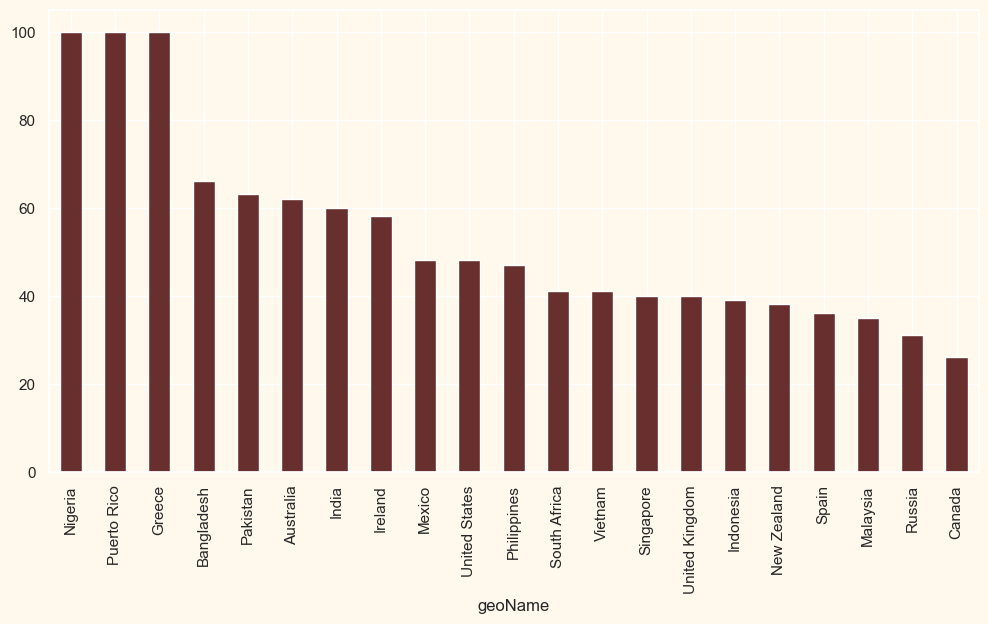

In [6]:
regiondf_12m['dry dog food'].sort_values(ascending= False).plot(figsize=(12, 6),\
                                                           y=regiondf_12m['dry dog food'].index,
                                                           kind ='bar', color = '#682F2F')

#### 2. Canned Dog Food Search Trend

<AxesSubplot: xlabel='geoName'>

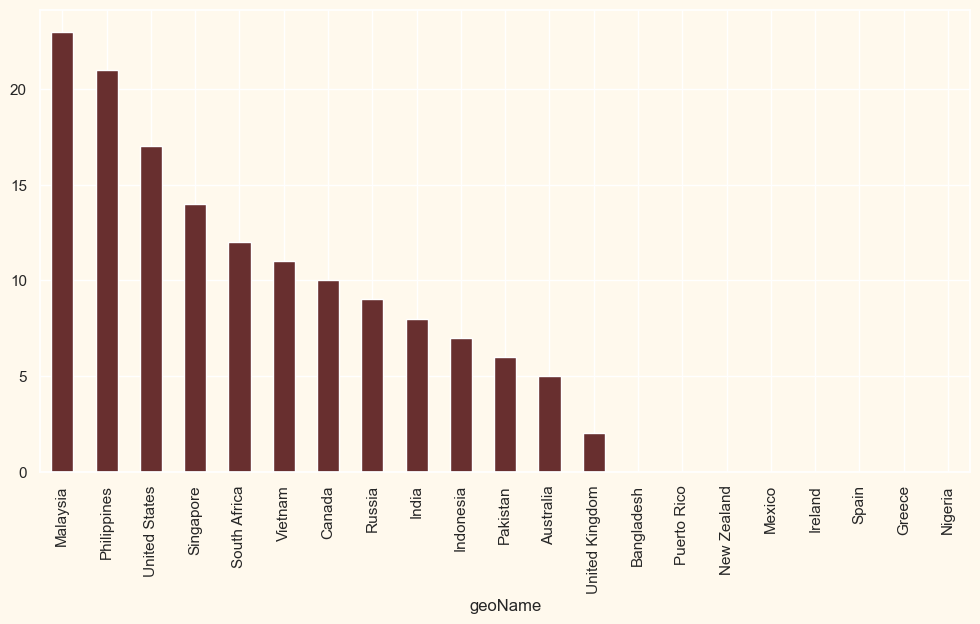

In [7]:
regiondf_12m['canned dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                              y=regiondf_12m['canned dog food'].index,
                                                              kind ='bar',color = '#682F2F')
     

#### 3. Raw Dog Food Search Trend

<AxesSubplot: xlabel='geoName'>

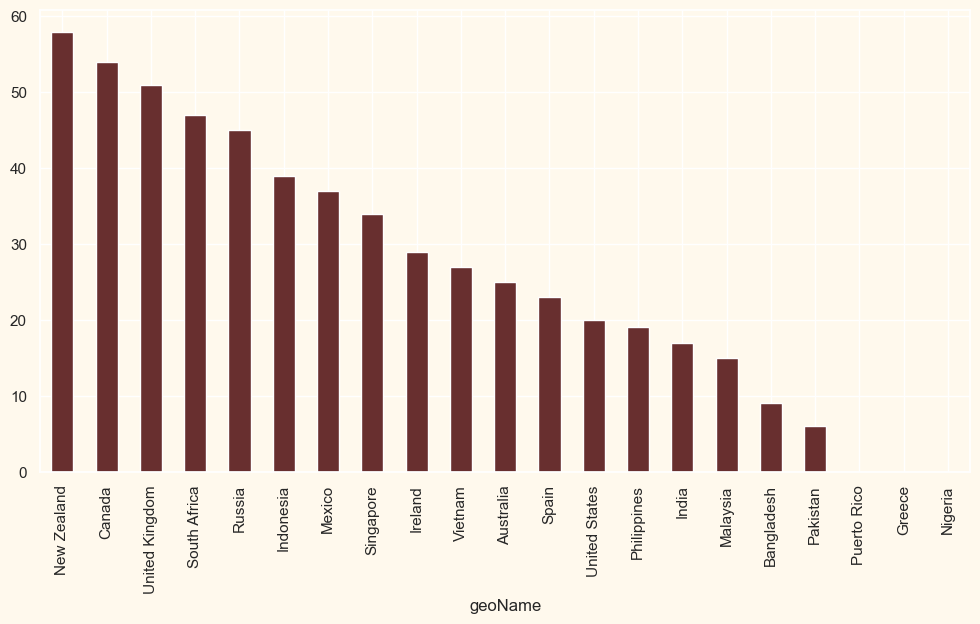

In [8]:

regiondf_12m['raw dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_12m['raw dog food'].index,
                                                          kind ='bar',color = '#682F2F')

#### 4. Natural Dog Food Search Trend

<AxesSubplot: xlabel='geoName'>

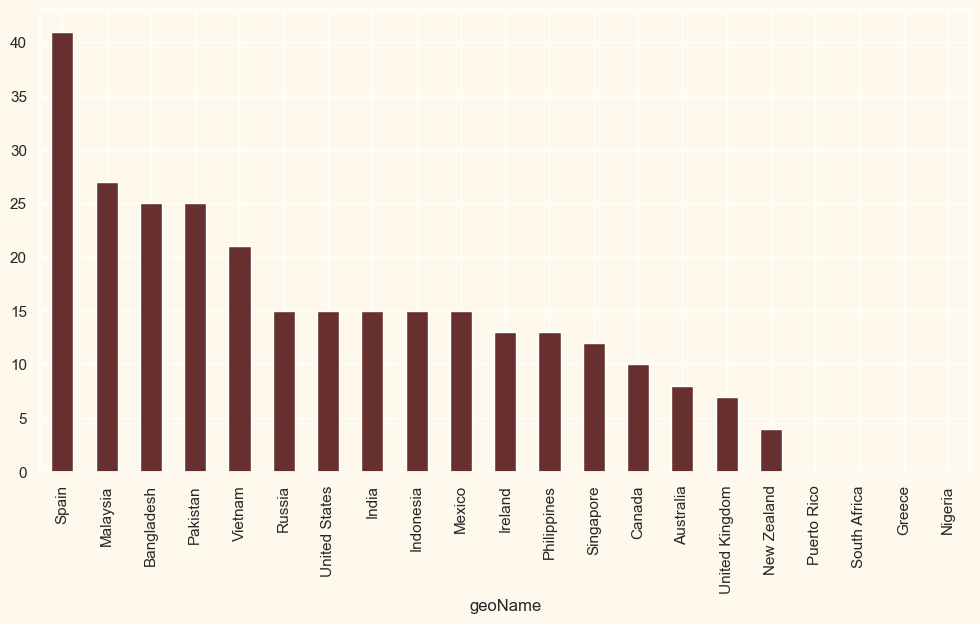

In [9]:
regiondf_12m['natural dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_12m['natural dog food'].index,
                                                          kind ='bar',color = '#682F2F')

### Global Search Trends for Last 3 Months

<AxesSubplot: xlabel='geoName'>

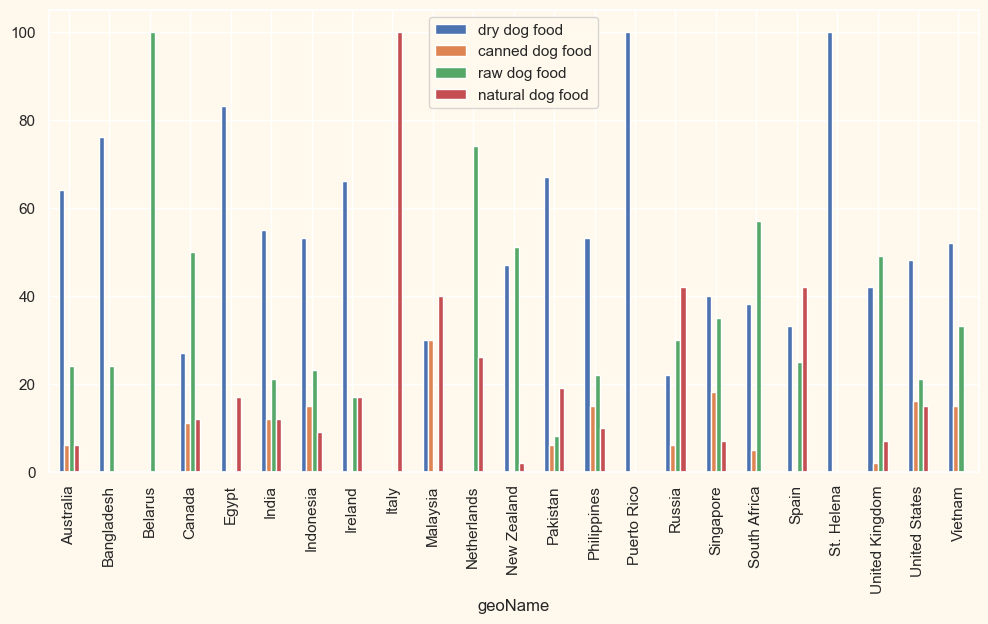

In [10]:
#search interest per region
pytrend = TrendReq()
pytrend.build_payload(kw_list, timeframe='today 3-m')

# Interest by Region
regiondf_3m = pytrend.interest_by_region()
# #looking at rows where all values are not equal to 0
regiondf_3m = regiondf_3m[regiondf_3m.sum(axis=1)!=0]

# #visualise
regiondf_3m.plot(figsize=(12, 6), y=kw_list, kind ='bar')

<AxesSubplot: xlabel='geoName'>

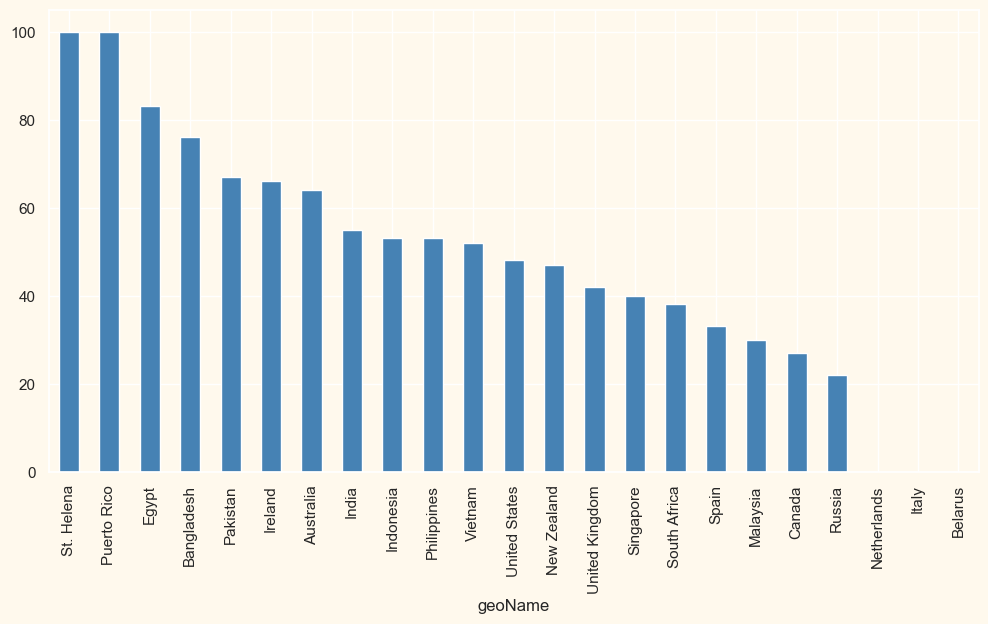

In [11]:
regiondf_3m['dry dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_3m['dry dog food'].index,
                                                          kind ='bar',color = 'steelblue')

<AxesSubplot: xlabel='geoName'>

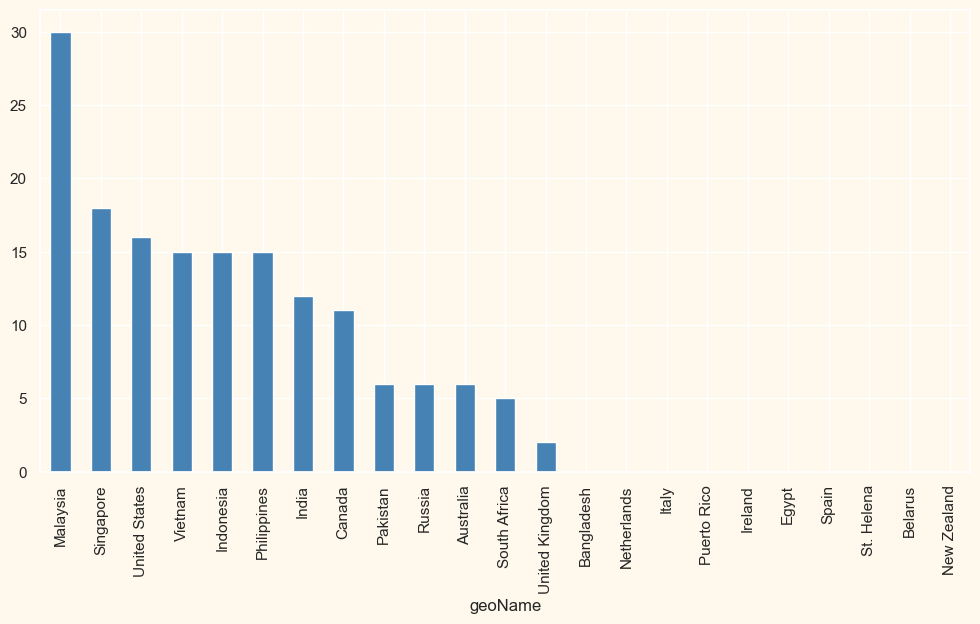

In [12]:
regiondf_3m['canned dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_3m['canned dog food'].index,
                                                          kind ='bar',color = 'steelblue')

<AxesSubplot: xlabel='geoName'>

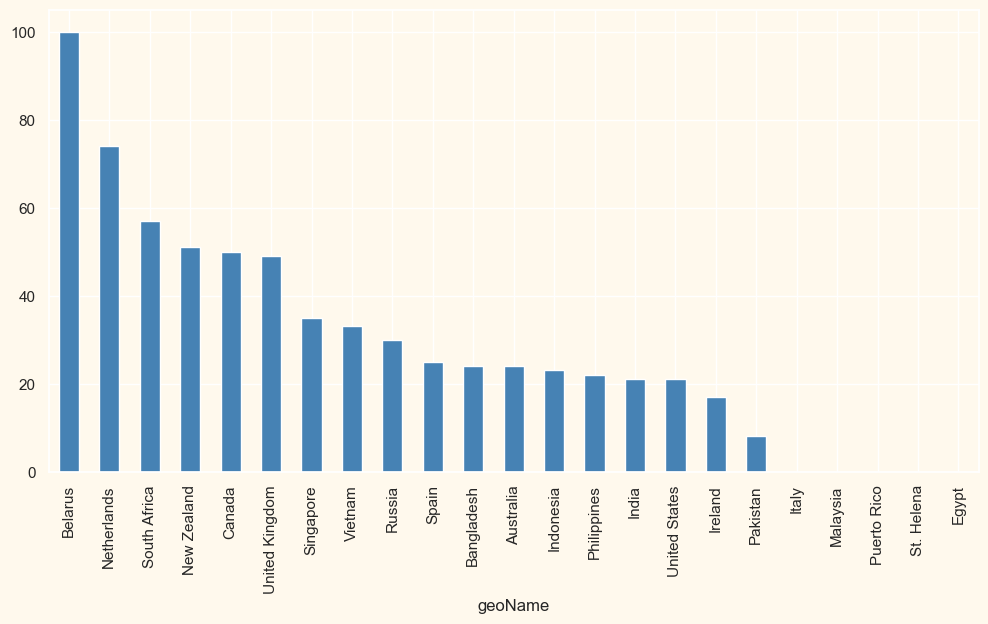

In [13]:
regiondf_3m['raw dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_3m['raw dog food'].index,
                                                          kind ='bar',color = 'steelblue')

<AxesSubplot: xlabel='geoName'>

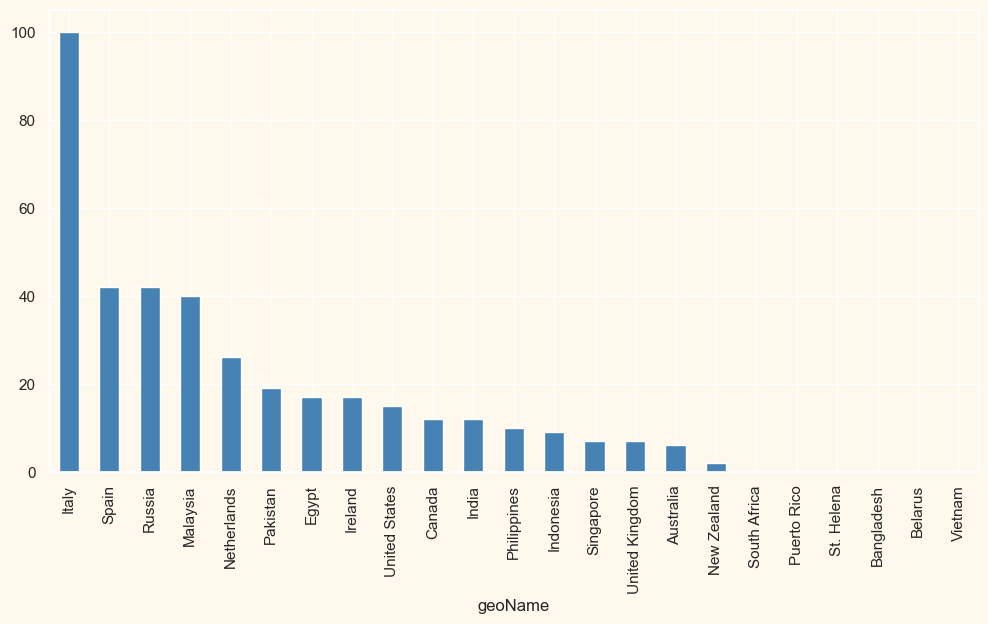

In [14]:
regiondf_3m['natural dog food'].sort_values(ascending= False).plot(figsize=(12, 6), 
                                                          y=regiondf_3m['natural dog food'].index,
                                                          kind ='bar',color ='steelblue')

### Calculate Global Change

In [15]:
#Calculate the change in shopping trend in last 3 months vs previous 12 months

df = pd.DataFrame([regiondf_3m['dry dog food'],
                  regiondf_12m['dry dog food'],
                  regiondf_3m['canned dog food'],
                  regiondf_12m['canned dog food'],
                  regiondf_3m['raw dog food'],
                  regiondf_12m['raw dog food'],
                  regiondf_3m['natural dog food'],
                  regiondf_12m['natural dog food']
                  ]).T

cols = ['dry_dog_food_3m','dry_dog_food_12m','canned_dog_food_3m','canned_dog_food_12m','raw_dog_food_3m','raw_dog_food_12m','natural_dog_food_3m','natural_dog_food_12m']
df.columns = cols

df['diff_dry'] = df['dry_dog_food_12m'] - df['dry_dog_food_3m']
df['diff_canned'] = df['canned_dog_food_12m'] - df['canned_dog_food_3m']
df['diff_raw'] = df['raw_dog_food_12m'] - df['raw_dog_food_3m']
df['diff_natural'] = df['natural_dog_food_12m'] - df['natural_dog_food_3m']

n_cols = ['diff_dry','diff_canned','diff_raw','diff_natural']

df = df[n_cols]
df.head()
     

,diff_dry,diff_canned,diff_raw,diff_natural
geoName,,,,
Australia,-2.0,-1.0,1.0,2.0
Bangladesh,-10.0,0.0,-15.0,25.0
Belarus,NaN,NaN,NaN,NaN
Canada,-1.0,-1.0,4.0,-2.0
Egypt,NaN,NaN,NaN,NaN


In [16]:
df = df[df.abs().sum(axis=1)!=0]
df.head()

,diff_dry,diff_canned,diff_raw,diff_natural
geoName,,,,
Australia,-2.0,-1.0,1.0,2.0
Bangladesh,-10.0,0.0,-15.0,25.0
Canada,-1.0,-1.0,4.0,-2.0
India,5.0,-4.0,-4.0,3.0
Indonesia,-14.0,-8.0,16.0,6.0


#### Countries with Biggest Change for Dry Dog Food in Last 3 Months

<AxesSubplot: xlabel='geoName'>

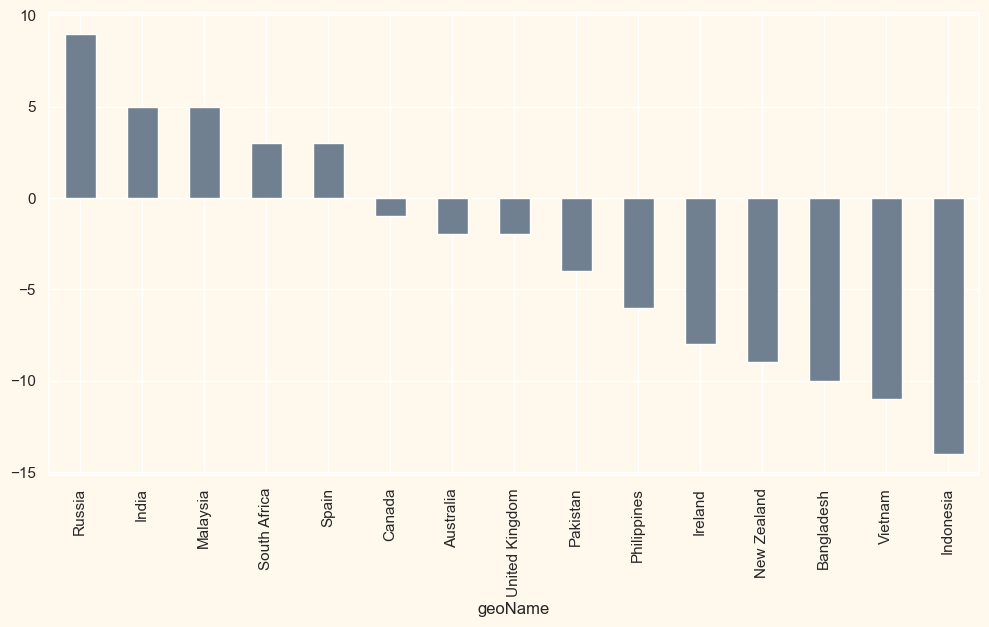

In [17]:
df['diff_dry'][df['diff_dry']!=0].sort_values(ascending = False).plot(figsize=(12, 6),
                                                                            y=df['diff_dry'][df['diff_dry']!=0].index,
                                                                            kind ='bar', color = 'slategray')

#### Countries with Biggest Change for Canned Dog Food in Last 3 Months

<AxesSubplot: xlabel='geoName'>

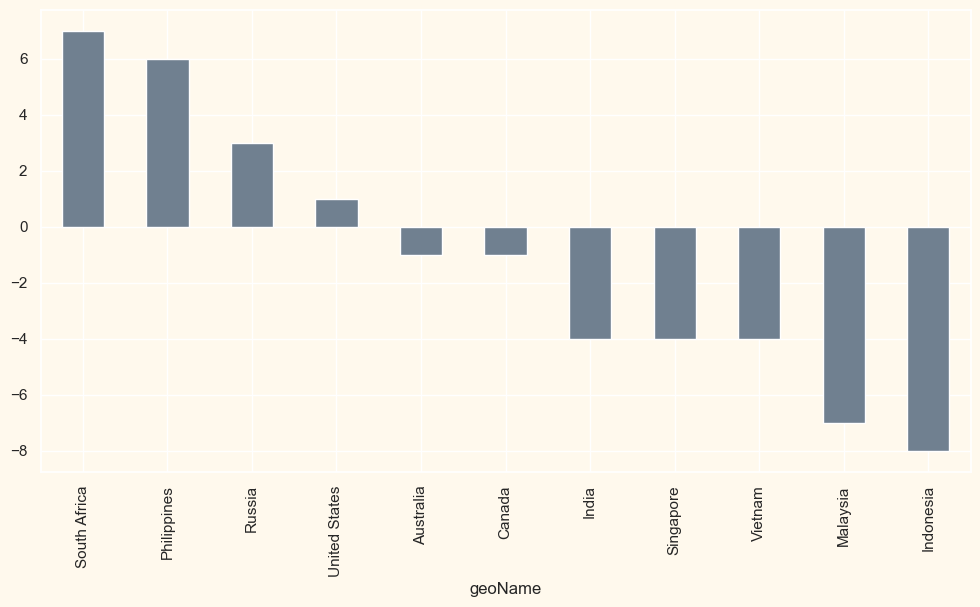

In [18]:

df['diff_canned'][df['diff_canned']!=0].sort_values(ascending = False).plot(figsize=(12, 6),
                                                                            y=df['diff_canned'][df['diff_canned']!=0].index,
                                                                            kind ='bar',color = 'slategray')

#### Countries with Biggest Change for Raw Dog Food in Last 3 Months

<AxesSubplot: xlabel='geoName'>

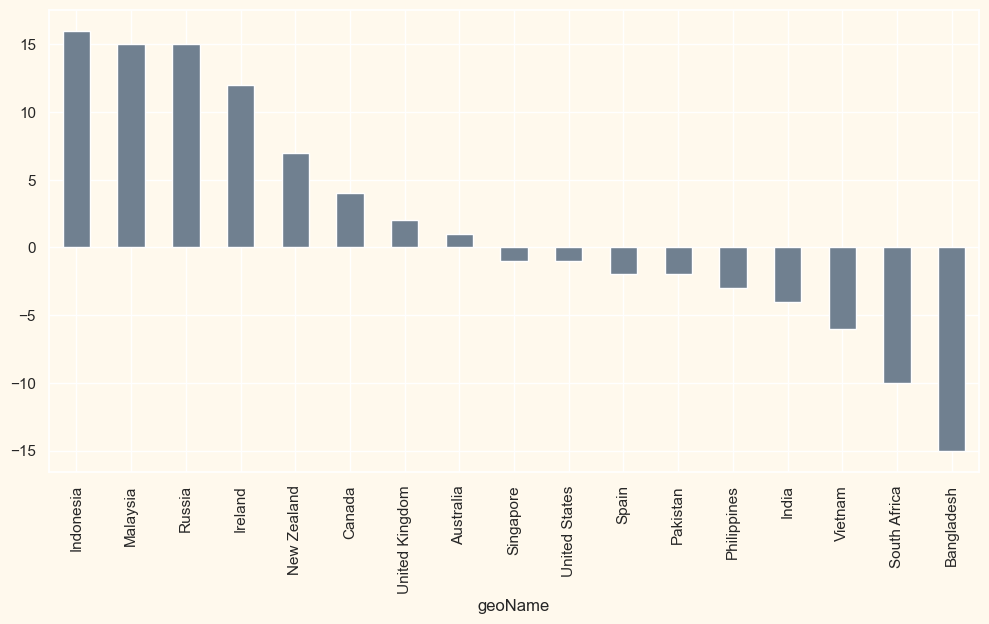

In [19]:
df['diff_raw'][df['diff_raw']!=0].sort_values(ascending = False).plot(figsize=(12, 6),
                                                                            y=df['diff_raw'][df['diff_raw']!=0].index,
                                                                            kind ='bar',color = 'slategray')

#### Countries with Biggest Change for Natural Dog Food in Last 3 Months 

<AxesSubplot: xlabel='geoName'>

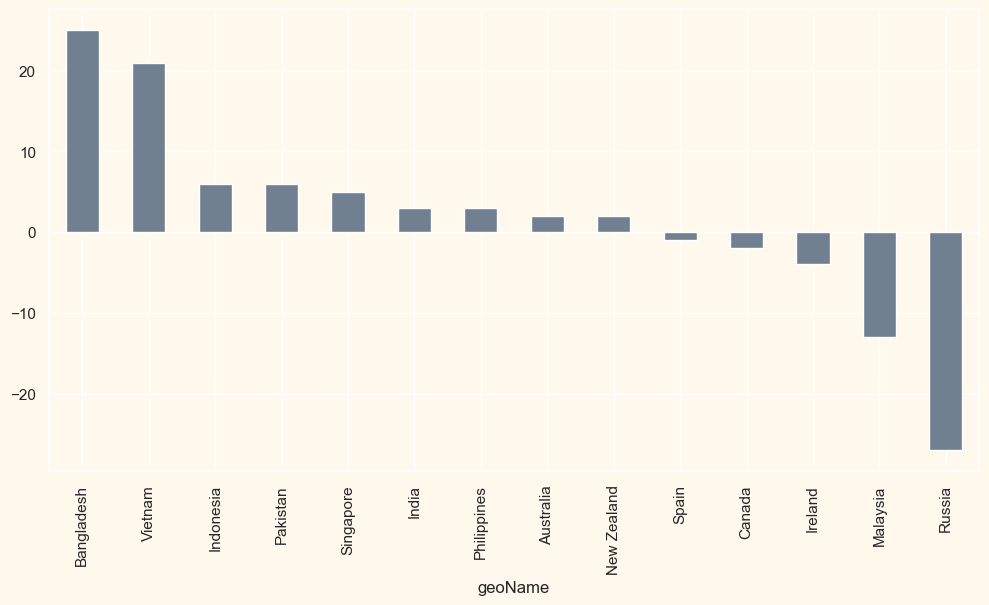

In [20]:
df['diff_natural'][df['diff_natural']!=0].sort_values(ascending = False).plot(figsize=(12, 6),
                                                                            y=df['diff_natural'][df['diff_natural']!=0].index,
                                                                            kind ='bar',color = 'slategray')

### Rising Search Queries for Dog Food & Cat Food In US, CA, NZ & AU 

In [21]:
geo = ['US','CA','NZ','AU']

d_full = pd.DataFrame()
for g in geo:
  pytrend.build_payload(kw_list=['dog food','cat food'],geo=g,timeframe='today 12-m')
  #get related queries
  related_queries = pytrend.related_queries()

  # Dog food
  d = related_queries['dog food']['top']
  d['source_query'] = 'dog food'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # Dog food rising
  d = related_queries['dog food']['rising']
  d['source_query'] = 'dog food'
  d['type'] = 'rising'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # Cat food top
  d = related_queries['cat food']['top']
  d['source_query'] = 'cat food'
  d['type'] = 'top'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)

  # cat food rising
  d = related_queries['cat food']['rising']
  d['source_query'] = 'cat food'
  d['type'] = 'rising'
  d['geo'] = g
  d_full = pd.concat([d_full,d],axis=0)
  

d_full = d_full.reset_index(drop=True)
     

In [22]:
d_full.head(10)

,query,value,source_query,type,geo
0,best dog food,100,dog food,top,US
1,purina dog food,48,dog food,top,US
2,purina,47,dog food,top,US
3,puppy food,41,dog food,top,US
4,dry dog food,40,dog food,top,US
5,dog food near me,39,dog food,top,US
6,good dog food,37,dog food,top,US
7,blue dog food,33,dog food,top,US
8,wet dog food,28,dog food,top,US
9,chewy,24,dog food,top,US


### Visualizing Top Search Queries in US for Dog Food

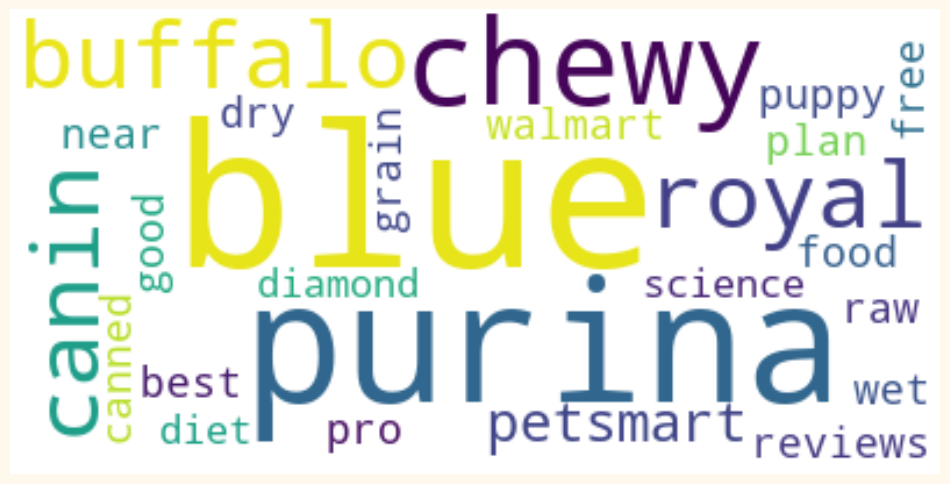

In [23]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


data = d_full[(d_full['source_query']=='dog food')&(d_full['type']=='top')&(d_full['geo']=='US')]

text = " ".join(i for i in data['query']).replace('dog food','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Visualizing Top Search Queries in US for Cat Food

(-0.5, 399.5, 199.5, -0.5)

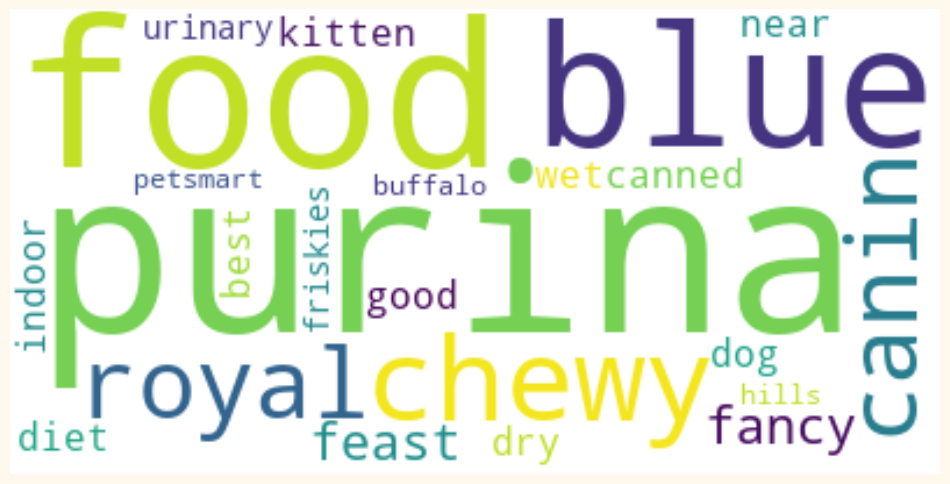

In [24]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt


data = d_full[(d_full['source_query']=='cat food')&(d_full['type']=='top')&(d_full['geo']=='US')]

text = " ".join(i for i in data['query']).replace('cat food','')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")